# Generating dimension reduction of just DC for visualisation

## Set up workspace

In [1]:
#load packages I need
import os
import tools
import scanpy as sc
import pandas as pd
import dandelion as ddl
from tqdm import tqdm
import matplotlib.pyplot as plt
import scanpy.external as sce
from matplotlib.pyplot import rc_context
import seaborn as sns

In [2]:
#set current directory 
os.chdir('/scratch/user/s4436039/scdata/Python_Integration_Sep')
os.getcwd()

'/scratch/user/s4436039/scdata/Python_Integration_Sep'

## Read in current, processed and clean atlas

In [3]:
# read in data
data = sc.read_h5ad('NRclean_clustered2.h5ad')

In [4]:
data

AnnData object with n_obs × n_vars = 498023 × 1268
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'cancer_type_broad', 'clean-leiden_0.8', 'clean-subcluster', 'clean-subcluster-v2', 'YS_sig', 'HSC_sig', 'CD5nDC2_up_vDC3', 'DC3_up_vCD5nDC2', 'CD5pDC2_up_vDC3', 'DC3_up_vCD5pDC2', 'DC3_up_vMono', 'Mono_up_vDC3', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'DC_Axl_sig', 'DC2_up_DC3', 'DC3_up_DC2', 'mregDC_sig', 'cDC1_mregDC', 'cDC2_mregDC', 'NR_annotati

## Subset out the DCs

In [5]:
data_DC = data[data.obs["NR_annotations_simple"].isin(["cDC1","cDC2","mregDC"])]

# repeat neighbours and UMAP on DC

In [6]:
## Computing neighbourhood graph - here UMAP
sc.pp.neighbors(data_DC, n_neighbors=10, n_pcs=60)

In [7]:
sc.tl.umap(data_DC, min_dist=0.3)  

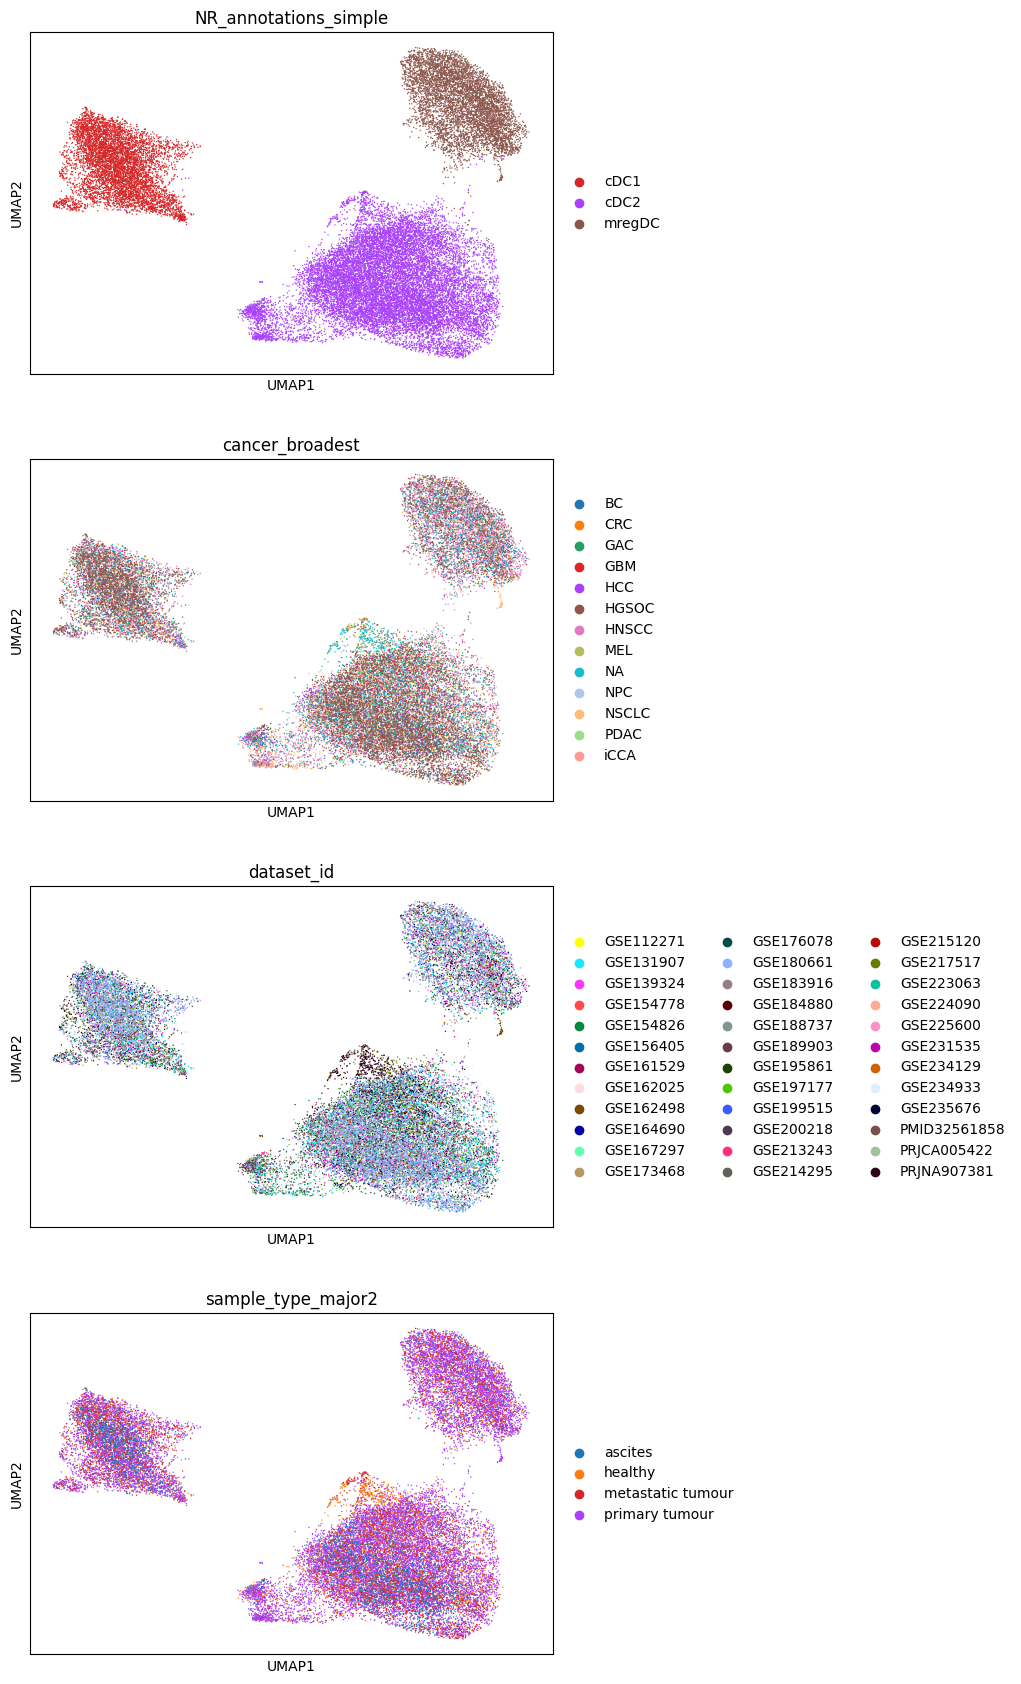

In [7]:
#visualise UMAP --> can see now integrated
sc.pl.umap(
    data_DC,
    color=[
        "NR_annotations_simple",
        "cancer_broadest",
        "dataset_id",
        "sample_type_major2"
    ],
    ncols=1,
)

# Export out DC alone

In [10]:
# Export out DC alone
data_DC.write_h5ad("NRclean_clustered2_DC.h5ad", compression="gzip")

In [3]:
# read in data
data = sc.read_h5ad('NRclean_clustered2_DC.h5ad')

# Visualisation: 

## Calculate DEG genes between DC clusters

In [8]:
#calculate DEG genes:
sc.tl.rank_genes_groups(data, groupby="NR_annotations_simple", method="wilcoxon")

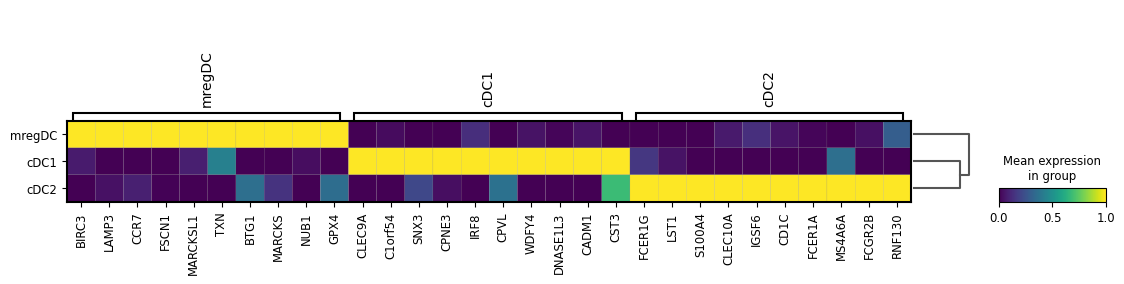

In [11]:
# visualise the top 10 DEG genes
sc.tl.dendrogram(data, groupby="NR_annotations_simple")
sc.pl.rank_genes_groups_matrixplot(data, groupby="NR_annotations_simple", standard_scale="var", n_genes=10, min_logfoldchange=1)

# Plot subsets as proportion of DCs by cancer type (plotting done on prism)

In [ ]:
# create objects for sample types 
data_primary = data[data.obs["sample_type_major2"] == "primary tumour"]
data_mets = data[data.obs["sample_type_major2"] == "metastatic tumour"]
data_H = data[data.obs["sample_type_major2"] == "healthy"]
data_OC = data[data.obs["cancer_with_H"] == "HGSOC"]

# Overlay select gene sets on DCs

# Overlay uptake signature (heat map and per sample as box plots)

# Overlay cytotrace results 